# 1. Retrieving and Preparing the Heart Failure Data-set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import graphviz

In [2]:
heartFailure=pd.read_csv("heart_failure_clinical_records_dataset.csv")
heartFailure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heartFailure.shape

(299, 13)

In [4]:
heartFailure.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Data Description:

Ejection_fraction = Ejection fraction (EF) is a measurement, expressed as a percentage,
                     of how much blood the left ventricle pumps out with each contraction. 

anaemia: decrease of red blood cells or hemoglobin (boolean)
high blood pressure: if the patient has hypertension (boolean)
 
creatinine_phosphokinase =  an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle.
                            The CPK normal range for a male is between 39 – 308 U/L, 
                            while in females the CPK normal range is between 26 – 192 U/L.
 
Platelets = The cells that circulate within our blood and bind together when they recognize damaged blood vessels.
             A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood.

serum_creatinine = An increased level of creatinine may be a sign of poor kidney function.
                    The typical range for serum creatinine is: For adult men, 0.74 to 1.35 mg/dL 
                    For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)

serum_sodium = A measurement in assessing electrolyte, acid-base, and water balance, as well as renal function.
               The reference range for serum sodium is 135-147 mmol/L.\
sex: woman[0] or man[1] (binary)\
smoking: if the patient smokes or not (boolean)\
time: follow-up period (days)\
[target] death event: if the patient deceased during the follow-up period (boolean)

## Data Preparation

In [5]:
# Searching null values
heartFailure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
heartFailure.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
# Searching in appropriate values
heartFailure.describe().loc[['count','max','min']]

# So, all data of anemia, diabetes, high_blood_pressure,sex,smoking death_event are valid data 
# as those are either boolean or binary.
# Data of age, ejection_fraction,serum_creatinine, serum_sodium, time features also valid.
# Let's check data of creatinine_phosphokinase,platelets,ejection_fraction. 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0
max,95.0,1.0,7861.0,1.0,80.0,1.0,850000.0,9.4,148.0,1.0,1.0,285.0,1.0
min,40.0,0.0,23.0,0.0,14.0,0.0,25100.0,0.5,113.0,0.0,0.0,4.0,0.0


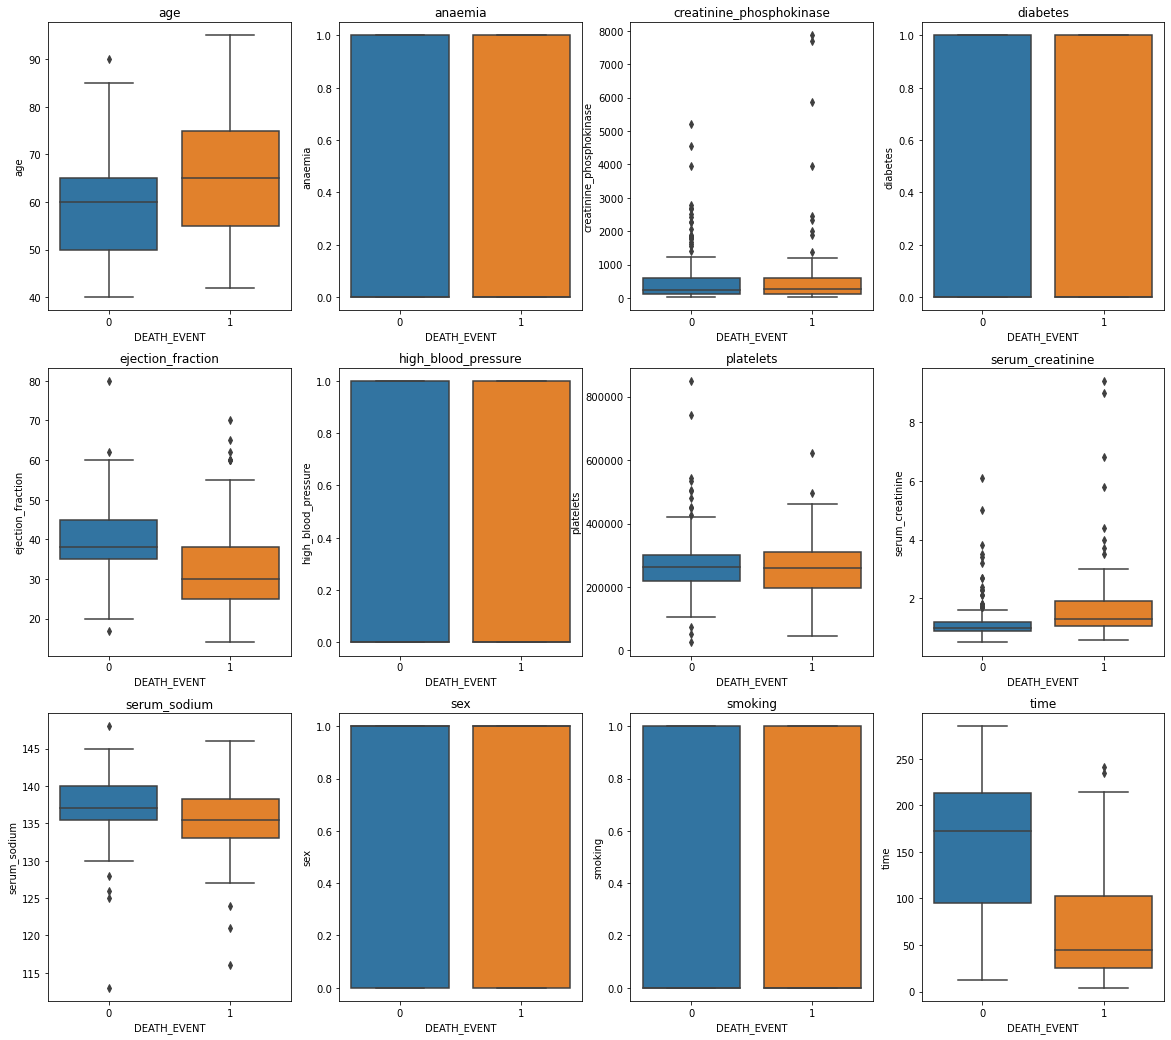

In [8]:
#Check all the numerical data
plt.figure(figsize=(20,18))
plt.subplots_adjust()
i = 1

for col in heartFailure.columns:
    if (heartFailure[col].dtypes == np.float64 or heartFailure[col].dtypes == np.int64) and col !='DEATH_EVENT':
            plt.subplot(3,4,i)
            sns.boxplot(x='DEATH_EVENT',y=col,data=heartFailure)
            i = i+1
            plt.title(col) 

plt.show()

In [9]:
print("Number of rows with creatinine_phosphokinase > 3000: ", np.sum(heartFailure['creatinine_phosphokinase']>3000))
print("Number of rows with platelets > 600000: ", np.sum(heartFailure['platelets']>600000))
print("Number of rows with serum_creatinine > 5: ", np.sum(heartFailure['serum_creatinine']>5))
print("Number of rows with serum_sodium < 120: ", np.sum(heartFailure['serum_sodium']<120))

Number of rows with creatinine_phosphokinase > 3000:  7
Number of rows with platelets > 600000:  3
Number of rows with serum_creatinine > 5:  5
Number of rows with serum_sodium < 120:  2


In [10]:
# removing outliers
heartFailure = heartFailure.loc[(heartFailure['creatinine_phosphokinase']<3000) & (heartFailure['platelets']<600000) &
                                    (heartFailure['serum_creatinine']<5) & (heartFailure['serum_sodium']>120)]

In [11]:
heartFailure.shape

(282, 13)

## 2. Data Exploration

In [12]:
patientDead=heartFailure[heartFailure['DEATH_EVENT']==1]

In [13]:
patientAlive=heartFailure[heartFailure['DEATH_EVENT']==0]

### 2.1 Exploration of Each Column

#### 2.1.1 Exploration of 'age' Feature

In [14]:
heartFailure.groupby('DEATH_EVENT')[['age']].describe()

age                                                    
             count       mean        std   min   25%   50%   75%   max
DEATH_EVENT                                                           
0            195.0  58.864959  10.555504  40.0  50.0  60.0  65.0  90.0
1             87.0  65.363989  13.300310  42.0  56.0  65.0  75.0  95.0

In [15]:
age_group_alive = pd.cut(patientAlive['age'], bins=[0, 40, 50, 60, 70, 80, 90,100])
age_group_dead = pd.cut(patientDead['age'], bins=[0, 40, 50, 60, 70, 80, 90,100])

In [16]:
counts_alive= age_group_alive.value_counts()
counts_dead = age_group_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
age_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive,
              'Total patient':counts_total, 'Death Percent in Same Age Group': percent.map(fmt)})

Text(0, 0.5, 'Numbers')

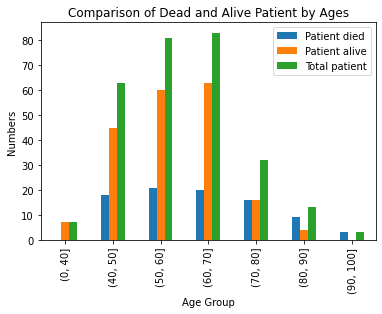

In [17]:
age_patient.plot(kind="bar")
plt.title("Comparison of Dead and Alive Patient by Ages")
plt.xlabel("Age Group")
plt.ylabel("Numbers")

#### 2.1.2  Exploration of 'anemia' feature

In [18]:
heartFailure['anaemia'].value_counts()

0    159
1    123
Name: anaemia, dtype: int64

<AxesSubplot:title={'center':'Death Percentages of Anaemia Positive Patients'}, ylabel='anaemia'>

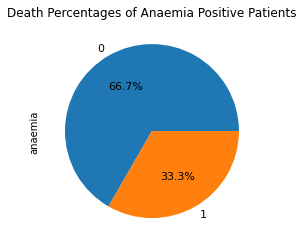

In [19]:
anaemia=heartFailure['anaemia'].groupby(heartFailure['DEATH_EVENT']).sum()
anaemia.plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="Death Percentages of Anaemia Positive Patients" )

#### 2.1.3 Exploration on 'time' feature

In [20]:
time_span_alive = pd.cut(patientAlive['time'], bins=[0, 50, 100, 150, 200, 250, 300])
time_span_dead = pd.cut(patientDead['time'], bins=[0, 50, 100, 150, 200, 250, 300])

In [21]:
counts_alive= time_span_alive.value_counts()
counts_dead = time_span_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
time_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive,
              'Total patient':counts_total, 'Death % in Same follow-up Time Group': percent.map(fmt)})
time_patient

,Patient died,Patient alive,Total patient,Death % in Same follow-up Time Group
"(0, 50]",45,6,51,88.2%
"(50, 100]",19,47,66,28.8%
"(100, 150]",9,43,52,17.3%
"(150, 200]",10,28,38,26.3%
"(200, 250]",4,61,65,6.2%
"(250, 300]",0,10,10,0.0%


#### 2.1.4 Exploration on 'serum_creatinine' feature

Text(0, 0.5, 'Level of Serium Creatinine')

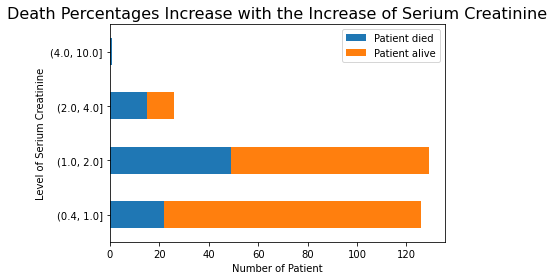

In [22]:
serum_alive = pd.cut(patientAlive['serum_creatinine'], bins=[0.4, 1, 2, 4, 10])
serum_dead = pd.cut(patientDead['serum_creatinine'], bins=[0.4, 1, 2, 4, 10])
counts_alive= serum_alive.value_counts()
counts_dead = serum_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
serium_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive})
serium_patient.plot(kind="barh",stacked=True)
plt.title("Death Percentages Increase with the Increase of Serium Creatinine", fontsize=16)
plt.xlabel("Number of Patient")
plt.ylabel("Level of Serium Creatinine")

#### 2.1.5 Exploration on 'sex' feature

In [23]:
heartFailure.sex.value_counts()

1    183
0     99
Name: sex, dtype: int64

<AxesSubplot:title={'center':'Are the Maximum Heart Patient Male?'}, ylabel='sex'>

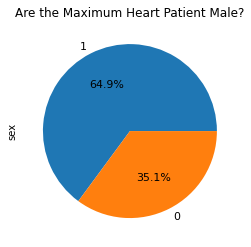

In [24]:
heartFailure.sex.value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="Are the Maximum Heart Patient Male?" )

#### 2.1.6 Exploration on 'smoking' feature

In [25]:
heartFailure['smoking'].value_counts()

0    194
1     88
Name: smoking, dtype: int64

<AxesSubplot:title={'center':'Are the Maximum Smokers Among Heart Patient Male?'}, ylabel='smoking'>

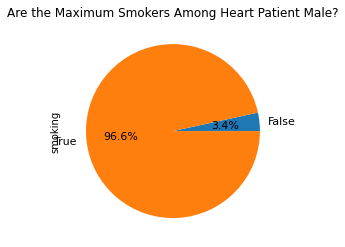

In [26]:
patient_smoking=heartFailure['smoking'].groupby(heartFailure['sex']==1).sum()
patient_smoking.plot(kind='pie',autopct='%1.1f%%', fontsize=11, title="Are the Maximum Smokers Among Heart Patient Male?" )

#### 2.1.7 Exploration on 'serum_sodium' feature

Text(0, 0.5, 'Numbers')

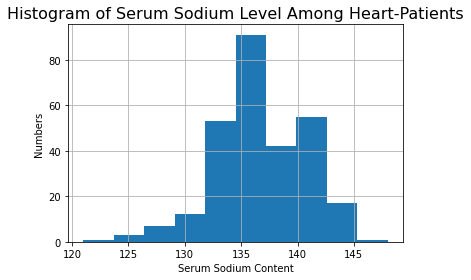

In [27]:
heartFailure['serum_sodium'].plot(kind="hist", grid ="True")
plt.title("Histogram of Serum Sodium Level Among Heart-Patients", fontsize=16)
plt.xlabel("Serum Sodium Content")
plt.ylabel("Numbers")

#### 2.1.8 Exploration on 'diabetes' feature

In [28]:
heartFailure['diabetes'].value_counts()

0    164
1    118
Name: diabetes, dtype: int64

<AxesSubplot:title={'center':'Do Maximum Diabetes Patient Die in case of Heart Failure?'}, ylabel='diabetes'>

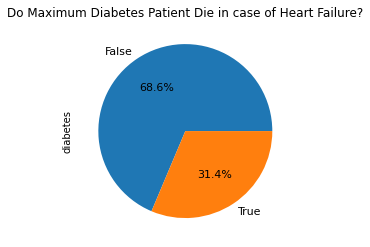

In [29]:
patient_dbts=heartFailure['diabetes'].groupby(heartFailure['DEATH_EVENT']==1).sum()
patient_dbts.plot(kind='pie',autopct='%1.1f%%', fontsize=11,title="Do Maximum Diabetes Patient Die in case of Heart Failure?" )

#### 2.1.9 Exploration on 'ejection_fraction' feature

Text(0, 0.5, 'Number of Patient')

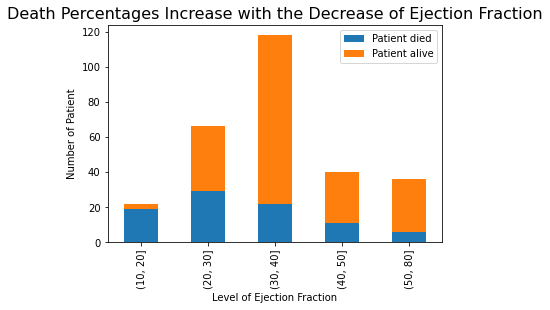

In [30]:
ejection_alive = pd.cut(patientAlive['ejection_fraction'], bins=[10, 20, 30, 40,50,80])
ejection_dead = pd.cut(patientDead['ejection_fraction'], bins=[10, 20, 30, 40,50,80])
counts_alive= ejection_alive.value_counts()
counts_dead = ejection_dead.value_counts()
counts_total = counts_alive+counts_dead
percent = counts_dead / counts_total
fmt = '{:.1%}'.format
serium_patient = pd.DataFrame({'Patient died': counts_dead, 'Patient alive': counts_alive})
serium_patient.plot(kind="bar",stacked=True)
plt.title("Death Percentages Increase with the Decrease of Ejection Fraction", fontsize=16)
plt.xlabel("Level of Ejection Fraction")
plt.ylabel("Number of Patient")

#### 2.1.10 Exploration on 'platelets' feature

Text(0, 0.5, 'Numbers')

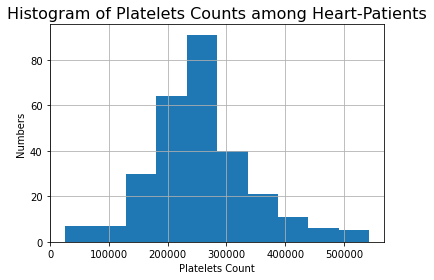

In [31]:
heartFailure['platelets'].plot(kind="hist", grid ="True")
plt.title("Histogram of Platelets Counts among Heart-Patients", fontsize=16)
plt.xlabel("Platelets Count")
plt.ylabel("Numbers")

### 2.1 Relationships Between All Pair of Attributes

In [32]:
'''
sns.set_style("whitegrid")
sns.pairplot(heartFailure[['age', 'anaemia', 'diabetes',
                           'ejection_fraction', 'high_blood_pressure','platelets',
                           'serum_creatinine','DEATH_EVENT','serum_sodium', 'time',]],
             hue = 'DEATH_EVENT', plot_kws={'alpha':.8,'s':50,'edgecolor':'r'}, height=2.5)
'''

'\nsns.set_style("whitegrid")\nsns.pairplot(heartFailure[[\'age\', \'anaemia\', \'diabetes\',\n                           \'ejection_fraction\', \'high_blood_pressure\',\'platelets\',\n                           \'serum_creatinine\',\'DEATH_EVENT\',\'serum_sodium\', \'time\',]],\n             hue = \'DEATH_EVENT\', plot_kws={\'alpha\':.8,\'s\':50,\'edgecolor\':\'r\'}, height=2.5)\n'

### Co-relation among features

In [33]:
cor = heartFailure.corr()

In [34]:
# sns.heatmap(cor, annot=True)

## Feature Selection

In [35]:
cor_target = abs(cor['DEATH_EVENT'])
relevant_features = cor_target[cor_target>0.1]
relevant_features

age                  0.254051
ejection_fraction    0.294667
serum_creatinine     0.333042
serum_sodium         0.217888
time                 0.516224
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [36]:
# So Selecting only highly related features with Death_event vaiable.
heartFailure1 =heartFailure[['age','serum_creatinine','serum_sodium','ejection_fraction','time','DEATH_EVENT']]

## Decision Tree Implementation

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X=heartFailure1.iloc[:,:-1].values
y=heartFailure1.iloc[:,-1].values
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2,random_state=2)

In [38]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 155, 1: 70})
Counter({0: 40, 1: 17})


In [39]:
clf_gini=DecisionTreeClassifier(criterion= 'gini', max_depth = None,min_samples_split =2,
                           min_samples_leaf =1, max_features = None,max_leaf_nodes =None)
fit = clf_gini.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [40]:
clf_entropy=DecisionTreeClassifier(criterion= 'entropy', max_depth = None,min_samples_split =2,
                           min_samples_leaf =1, max_features = None,max_leaf_nodes =None)
fit2 = clf_entropy.fit(X_train, y_train)
y_pre2 = fit2.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pre)
print(cm)

[[36  4]
 [ 6 11]]


In [42]:
cm2= confusion_matrix(y_test, y_pre2)
print(cm2)

[[37  3]
 [ 5 12]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        40
           1       0.73      0.65      0.69        17

    accuracy                           0.82        57
   macro avg       0.80      0.77      0.78        57
weighted avg       0.82      0.82      0.82        57



In [44]:
print(classification_report(y_test,y_pre2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        40
           1       0.80      0.71      0.75        17

    accuracy                           0.86        57
   macro avg       0.84      0.82      0.83        57
weighted avg       0.86      0.86      0.86        57



## Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV
param_dict ={
    "criterion" :['gini', 'entropy'],
    "max_depth":range(5,15),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5),
    "class_weight": ['balanced', 'None']
}
decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree, param_grid = param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:    6.3s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'None'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [46]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [47]:
grid.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=3)

In [48]:
grid.best_score_

0.8169960474308301

In [49]:
clf_test=DecisionTreeClassifier(criterion= 'gini',max_depth=8,  min_samples_split =2,class_weight='balanced',
                           min_samples_leaf =4, max_features = None,max_leaf_nodes =None )
fit_test = clf_test.fit(X_train, y_train)
y_pre_test = fit_test.predict(X_test)
cm= confusion_matrix(y_test, y_pre_test)
print(cm)
print(classification_report(y_test,y_pre_test))

[[32  8]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        40
           1       0.64      0.82      0.72        17

    accuracy                           0.81        57
   macro avg       0.78      0.81      0.79        57
weighted avg       0.83      0.81      0.81        57



## Decision Tree Visualisation

In [50]:
from sklearn import tree
with open ("heart_failure_clinical_records_dataset1.csv","w") as z:
    z=tree.export_graphviz(clf_gini, out_file="tree1.dot",feature_names = ['age','serum_creatinine',
                                                            'serum_sodium','ejection_fraction','time'],
        class_names = 'DEATH_EVENT', filled =True, rounded =True,special_characters =True)

In [51]:
with open ("heart_failure_clinical_records_dataset2.csv","w") as z:
    z=tree.export_graphviz(clf_entropy, out_file="tree2.dot",feature_names = ['age','serum_creatinine',
                                                            'serum_sodium','ejection_fraction','time'],
        class_names = 'DEATH_EVENT', filled =True, rounded =True,special_characters =True)

In [52]:
with open ("heart_failure_clinical_records_dataset3.csv","w") as z:
    z=tree.export_graphviz(clf_test, out_file="tree3.dot",feature_names = ['age','serum_creatinine',
                                                            'serum_sodium','ejection_fraction','time'],
        class_names = 'DEATH_EVENT', filled =True, rounded =True,special_characters =True)

In [53]:
'''
with open("tree1.dot") as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)
graph.format='png'
graph.render('tree1',view=True)
'''

'\nwith open("tree1.dot") as f:\n    dot_graph = f.read()\n\ngraph = graphviz.Source(dot_graph)\ngraph.format=\'png\'\ngraph.render(\'tree1\',view=True)\n'

In [54]:
'''
with open("tree2.dot") as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)
graph.format='png'
graph.render('tree2',view=True)
'''

'\nwith open("tree2.dot") as f:\n    dot_graph = f.read()\n\ngraph = graphviz.Source(dot_graph)\ngraph.format=\'png\'\ngraph.render(\'tree2\',view=True)\n'

In [55]:
'''
with open("tree3.dot") as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)
graph.format='png'
graph.render('tree3',view=True)
'''

'\nwith open("tree3.dot") as f:\n    dot_graph = f.read()\n\ngraph = graphviz.Source(dot_graph)\ngraph.format=\'png\'\ngraph.render(\'tree3\',view=True)\n'

## Cross-checking Feature Selection with Hill-Climbing Technique

In [56]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=0)
print(col_Ind_Random)
print(heartFailure.columns)

[6, 11, 4, 10, 2, 8, 1, 7, 9, 3, 0, 5, 12]
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [57]:
## double check code below

In [58]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = heartFailure.iloc[:,new_Ind]
    #print(newData)
    X_train, X_test, y_train, y_test=train_test_split(newData,y, test_size=.2,random_state=0)
    #clf=DecisionTreeClassifier(criterion= 'gini', max_depth = None,min_samples_split =2,
                               #min_samples_leaf =1, max_features = None,max_leaf_nodes =None)
    fit = clf_gini.fit(X_train, y_train)
    cur_Score = clf_gini.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + "(feature: " + 
              str(col_Ind_Random[cur_f])+ ") selected features: " + str(round(cur_Score,2)))
    

Score with 1(feature: 6) selected features: 0.7
Score with 2(feature: 11) selected features: 0.72
Score with 3(feature: 4) selected features: 0.82
Score with 4(feature: 10) selected features: 0.86
Score with 5(feature: 2) selected features: 0.86
Score with 6(feature: 9) selected features: 0.86
Score with 7(feature: 3) selected features: 0.86
Score with 8(feature: 5) selected features: 0.86
Score with 9(feature: 12) selected features: 1.0



## KN neighbourhood Classification


In [59]:
from sklearn.model_selection import train_test_split
X=heartFailure1.iloc[:,:-1].values
y=heartFailure1.iloc[:,-1].values
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2,random_state=2)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
clf_distance = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='distance', p=1)
# , metric='minkowski'

In [61]:
clf_distance.fit(X_train, y_train)
predicted_distance = clf_distance.predict(X_test)

In [62]:
predicted_distance

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [63]:
y_test

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [64]:
predicted_distance.shape, y_train.shape

((57,), (225,))

In [65]:
cm_d = confusion_matrix(y_test,predicted_distance)
print(cm_d)

[[37  3]
 [ 6 11]]


In [66]:
print("[Train/test split] score following distance weight: {:.2f}".format(clf_distance.score(X_test, y_test)))

[Train/test split] score following distance weight: 0.84


In [67]:
print(classification_report(y_test,predicted_distance))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.79      0.65      0.71        17

    accuracy                           0.84        57
   macro avg       0.82      0.79      0.80        57
weighted avg       0.84      0.84      0.84        57



## KNN Hyperparameter Tuning and Visualization

### Crosschecking with n_neighbours=5, weight= "distance", p=2

In [68]:
clf_distance = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='distance', p=2)
clf_distance.fit(X_train, y_train)
predicted_distance = clf_distance.predict(X_test)
print("[Train/test split] score following distance weight: {:.2f}".format(clf_distance.score(X_test, y_test)))

[Train/test split] score following distance weight: 0.81


### Crosschecking with n_neighbours=5, weight= "distance", p=5

In [69]:
clf_distance = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='distance', p=5)
clf_distance.fit(X_train, y_train)
predicted_distance = clf_distance.predict(X_test)
print("[Train/test split] score following distance weight: {:.2f}".format(clf_distance.score(X_test, y_test)))

[Train/test split] score following distance weight: 0.82


### Crosschecking with n_neighbours=3, weight= "distance", p=1

In [70]:
# So far, weight=distance, p=1 is showing the better fit. 
# So changing the n_neighours only for p=1, weight=distance to find out best fit

In [71]:
clf_distance = KNeighborsClassifier(n_neighbors=3, metric='minkowski', weights='distance', p=1)
clf_distance.fit(X_train, y_train)
predicted_distance = clf_distance.predict(X_test)
print("[Train/test split] score following distance weight: {:.2f}".format(clf_distance.score(X_test, y_test)))

[Train/test split] score following distance weight: 0.84


In [72]:
clf_distance = KNeighborsClassifier(n_neighbors=7, metric='minkowski', weights='distance', p=1)
clf_distance.fit(X_train, y_train)
predicted_distance = clf_distance.predict(X_test)
print("[Train/test split] score following distance weight: {:.2f}".format(clf_distance.score(X_test, y_test)))

[Train/test split] score following distance weight: 0.82


### Crosschecking with n_neighbours=5, weight= "uniform", p=1

In [73]:
clf_uniform = KNeighborsClassifier(n_neighbors=5,metric='minkowski', weights='uniform', p=1)
clf_uniform.fit(X_train, y_train)
predicted_uniform = clf_uniform.predict(X_test)
print("[Train/test split] score following uniform weight: {:.2f}".format(clf_uniform.score(X_test, y_test)))

[Train/test split] score following uniform weight: 0.86


### Crosschecking with n_neighbours=5, weight= "uniform", p=2

In [74]:
clf_uniform = KNeighborsClassifier(n_neighbors=5,metric='minkowski', weights='uniform', p=2)
clf_uniform.fit(X_train, y_train)
predicted_uniform = clf_uniform.predict(X_test)
print("[Train/test split] score following uniform weight: {:.2f}".format(clf_uniform.score(X_test, y_test)))

[Train/test split] score following uniform weight: 0.84


### Crosschecking with n_neighbours=5, weight= "uniform", p=5

In [75]:
clf_uniform = KNeighborsClassifier(n_neighbors=5,metric='minkowski', weights='uniform', p=5)
clf_uniform.fit(X_train, y_train)
predicted_uniform = clf_uniform.predict(X_test)
print("[Train/test split] score following uniform weight: {:.2f}".format(clf_uniform.score(X_test, y_test)))

[Train/test split] score following uniform weight: 0.84


In [76]:
# So far, weight=uniform, p=1 is showing the best fit. 
# So changing the n_neighours only for p=1, weight=uniform to find out best fit

### Crosschecking with n_neighbours=3, weight= "uniform", p=1

In [77]:
clf_uniform = KNeighborsClassifier(n_neighbors=3,metric='minkowski', weights='uniform', p=1)
clf_uniform.fit(X_train, y_train)
predicted_uniform = clf_uniform.predict(X_test)
print("[Train/test split] score following uniform weight: {:.2f}".format(clf_uniform.score(X_test, y_test)))

[Train/test split] score following uniform weight: 0.84


### Crosschecking with n_neighbours=7, weight= "uniform", p=1

In [78]:
clf_uniform = KNeighborsClassifier(n_neighbors=7,metric='minkowski', weights='uniform', p=1)
clf_uniform.fit(X_train, y_train)
predicted_uniform = clf_uniform.predict(X_test)
print("[Train/test split] score following uniform weight: {:.2f}".format(clf_uniform.score(X_test, y_test)))

[Train/test split] score following uniform weight: 0.81


In [79]:
# So from all trial and errors, it is obvious that 
# n_neighbours=5, weight= "uniform", p=1 is the best parameters for this data-set

## Selected Features for KNN Model

In [80]:
clf_uniform = KNeighborsClassifier(n_neighbors=5,metric='minkowski', weights='uniform', p=1)
clf_uniform.fit(X_train, y_train)
predicted_uniform = clf_uniform.predict(X_test)
print("[Train/test split] score following uniform weight: {:.2f}".format(clf_uniform.score(X_test, y_test)))

[Train/test split] score following uniform weight: 0.86


## Cross-checking Feature Selection With Hill-Climbing Technique

In [81]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num), random_state=2)
print(col_Ind_Random)
print(heartFailure.columns)

[4, 0, 10, 5, 3, 1, 9, 7, 11, 2, 6, 12, 8]
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [82]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = heartFailure.iloc[:,new_Ind]
    #print(newData)
    X_train, X_test, y_train, y_test=train_test_split(newData,y, test_size=.2,random_state=0)
    fit = clf_distance.fit(X_train, y_train)
    cur_Score = clf_distance.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + "(feature: " + str(col_Ind_Random[cur_f])+ ") selected features: " + str(round(cur_Score,2)))

Score with 1(feature: 4) selected features: 0.79
Score with 2(feature: 0) selected features: 0.79
Score with 3(feature: 10) selected features: 0.82
Score with 4(feature: 7) selected features: 0.84
Score with 5(feature: 11) selected features: 0.95
Score with 6(feature: 12) selected features: 0.95
Score with 7(feature: 8) selected features: 0.96


## K-Folds Cross-Validation

In [83]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=4)

C:\Users\snk_n\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


## Validation of Decision Tree Model

In [84]:
for k, (train_index, test_index) in enumerate(kf.split(heartFailure1)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_entropy.fit(X_train, y_train)
    print("[fold {0}] score: {1:.3f}".format(k, clf_entropy.score(X_test, y_test)))

[fold 0] score: 0.897
[fold 1] score: 0.690
[fold 2] score: 0.571
[fold 3] score: 0.750
[fold 4] score: 0.786
[fold 5] score: 0.786
[fold 6] score: 0.714
[fold 7] score: 0.750
[fold 8] score: 0.821
[fold 9] score: 1.000


## Validation of K-Neighbourhood Model

In [85]:
for k, (train_index, test_index) in enumerate(kf.split(heartFailure1)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_distance.fit(X_train, y_train)
    print("[fold {0}] score: {1:.3f}".format(k, clf_distance.score(X_test, y_test)))

[fold 0] score: 0.897
[fold 1] score: 0.759
[fold 2] score: 0.750
[fold 3] score: 0.750
[fold 4] score: 0.786
[fold 5] score: 0.821
[fold 6] score: 0.750
[fold 7] score: 0.893
[fold 8] score: 0.893
[fold 9] score: 1.000
